# SMS Spam Classifier
- **@author : Raj Adhikari**
- This Notebook explores **SMS Spam Classification** task using NLP
- Contains Use of **Machine Learning** and **Deep learning** 
- **APIs** : numpy, pandas, sci-kit, pytorch

## Import : Data Manupilation Libraries

In [2]:
import numpy as np
import pandas as pd

## Import : Dataset, Verifying dataset

In [19]:
df = pd.read_csv("~/CodSoft/Datasets/SMS Spam Dataset/spam.csv", encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Dataset Information

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Observations
- Dataset has 5 columns
- Column data type : Object
- Col v1, v2 has no NULL values
- Col Unnamed :2, 3, and 4 have more than 90% NULL values

## Data Preprocessing: 
- Renaming Column v1 and v2 to label and message
- Remioving NON useful columns

In [42]:
df = df.rename(columns={'v1':'label', 'v2':'message'})
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Preprocessing : Extracting Useful columns

In [53]:
data_df = df.iloc[:,:-3]
data_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Dataset Statistics
- Checking Detailed Statistics for the cleaned dataset

In [68]:
data_df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [70]:
# QUICK CHECK : For NULL values if any
data_df.isnull().sum()

label      0
message    0
dtype: int64

## EDA : Visualizing Data

In [73]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

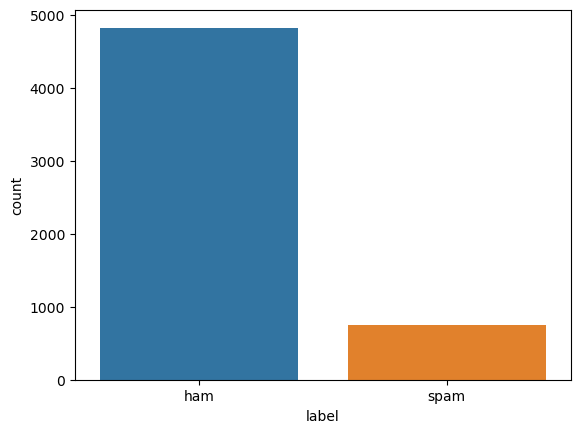

In [77]:
sns.countplot(data_df, x='label', hue='label')

In [89]:
ham = len(data_df[data_df['label'] == 'ham']) / len(data_df) * 100
spam = len(data_df[data_df['label'] == 'spam']) / len(data_df) * 100
print(f"Ham : {ham:.2f} %")
print(f"Spam : {spam:.2f} %")

Ham : 86.59 %
Spam : 13.41 %


### Observation
- Dataset is **QUITE IMBALANCED** 
- Around **86%** is **HAM** and approx **13%** is **SPAM**
- This means Approx 86 % times ie a **Dummy Model** would have an **acuracy of 86%** just by predicting **HAM** and not **learning**

## Feature Engineering
- Adding Featues based on domain knowledge

In [101]:
## Creatinga  copy
data_df = data_df.copy()

In [103]:
# Feature 1 : Message length 
data_df['message_length'] = data_df['message'].apply(len)

In [105]:
data_df.head()

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## EDA : Plotting Results

### Univariabe : Length

<Axes: xlabel='message_length', ylabel='Count'>

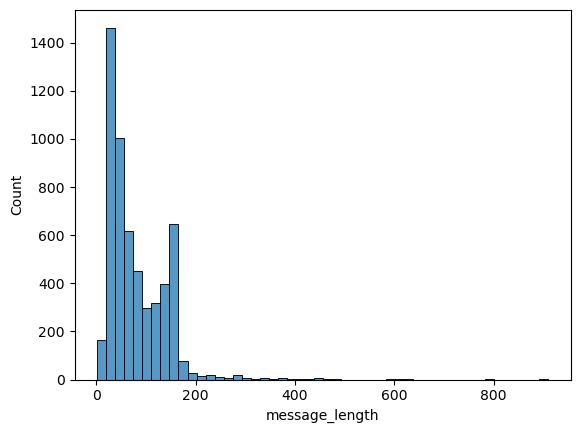

In [114]:
sns.histplot(data=data_df, x='message_length', bins=50)

### Biltivariate : Length

<Axes: xlabel='message_length', ylabel='Count'>

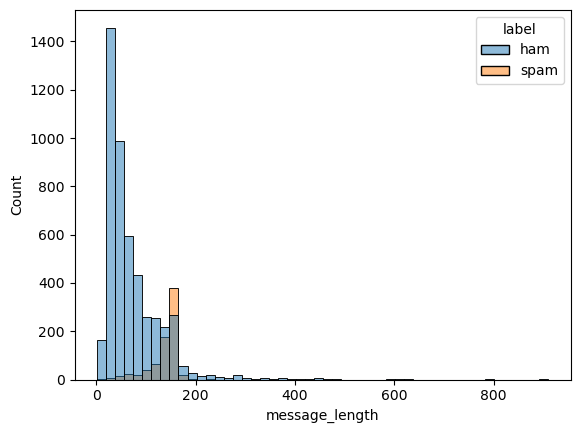

In [134]:
sns.histplot(data=data_df, x='message_length', bins=50, hue='label')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

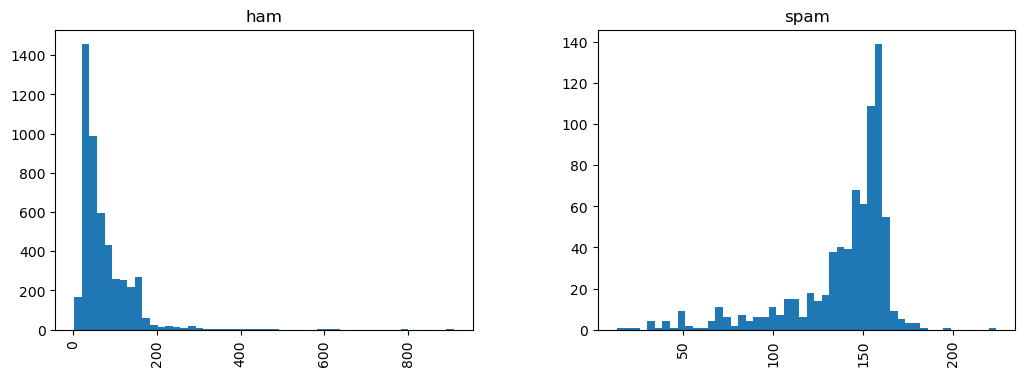

In [138]:
data_df.hist(column='message_length', by='label', bins=50, figsize=(12,4))

In [144]:
# Checking Describe for SPAM column
data_df[data_df['label'] == 'spam']['message_length'].describe()

count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64

In [146]:
# Checking Describe for HAM column
data_df[data_df['label'] == 'ham']['message_length'].describe()

count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: message_length, dtype: float64

### Observations:
- Mean > Median : Right Ended Tail (Most messages are in early bins)
- **HAM** :
   - Most messages fall in 0 to 100 range
   - MEAN > MEDIAN : Right Tailed 

- **SPAM** :
  - Most messages are clost ot 200
  - MEDIAN > MEAN : Left Tailed

- **Inference** : We can state that **Spam** message is decently assocaited with Higher message length

## Data Splitting : Training, Validation and Testing Data

In [246]:
from sklearn.model_selection import train_test_split

In [250]:
train_df, test_df = train_test_split(data_df, test_size=0.30, random_state=42)

In [253]:
# Checking Shapes
train_df.shape, test_df.shape

((3900, 3), (1672, 3))

### Creating validation dataset

In [277]:
X = train_df['message']
Y = train_df['label']

In [279]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)

In [283]:
# Checking shapes
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2496,), (624,), (2496,), (624,))

### Test Dataset Split

In [377]:
x_test = test_df['message']
y_test = test_df['label']

In [379]:
x_test.shape, y_test.shape

((1672,), (1672,))

## Data Preprocessing : Working With textual data
- Converting data to tokens (single unitO
- Removing Punctutations and Stop words

In [181]:
import string
from nltk.corpus import stopwords

### Custom Fucntion for preprocessing messages

In [204]:
def text_process(message):

    # 1. Remove punct
    nopunc = ''.join([c for c in message if c not in string.punctuation]).split()

    # 2. Tokenize
    msg_tokens = [str(word).lower() for word in nopunc]

    # 3. Stop words
    msg_tokens = [word for word in msg_tokens if word not in stopwords.words('english')]

    return msg_tokens

## Data Preprocessing : Text Vectorization

In [262]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [266]:
# Using Custom fucntion as analyzerr
count = TfidfVectorizer(analyzer=text_process)

In [287]:
# Applying TfiDf
X_train_tfidf = count.fit_transform(x_train)

## Model Building :
- **Models**:
    1. Support Vector Machine (LinearSVC)
    2. Random Forest Classiier (RFC)

In [347]:
from sklearn.svm import LinearSVC

In [301]:
clf = LinearSVC(dual=True)

In [303]:
clf.fit(X_train_tfidf, y_train)

LinearSVC(dual=True)

### Creating Pipeline for Streamling process

In [305]:
from sklearn.pipeline import Pipeline

In [505]:
test_clf = Pipeline(
    [
        ('tfidf', TfidfVectorizer(analyzer=text_process)),
        ('clf', LinearSVC(class_weight={'ham':0.20, 'spam':8.0}, penalty='l2', dual=True, max_iter=10000)),
    ]
)

In [467]:
test_clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function text_process at 0x0000020A35921260>)),
                ('clf',
                 LinearSVC(class_weight={'ham': 0.2, 'spam': 7.14},
                           dual=True))])

In [468]:
predictions = test_clf.predict(x_val)

In [469]:
from sklearn.metrics import confusion_matrix, classification_report

In [470]:
print(confusion_matrix(y_val, predictions))

[[531   8]
 [  1  84]]


In [396]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       539
        spam       0.90      0.99      0.94        85

    accuracy                           0.98       624
   macro avg       0.95      0.99      0.97       624
weighted avg       0.99      0.98      0.98       624



## Setting Model : Test set

### Training Model on Train + Val datasets

In [414]:
x_final = pd.concat((x_train, x_val))
y_final = pd.concat((y_train, y_val))

In [507]:
test_clf.fit(x_final, y_final)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer=<function text_process at 0x0000020A35921260>)),
                ('clf',
                 LinearSVC(class_weight={'ham': 0.2, 'spam': 8.0}, dual=True,
                           max_iter=10000))])

## Test Dataset Predictions

In [509]:
predictions = test_clf.predict(x_test)

In [510]:
print(confusion_matrix(y_test, predictions))

[[1434   19]
 [  18  201]]


## Random Forest Classifier

In [515]:
from sklearn.ensemble import RandomForestClassifier

In [535]:
test_clf = Pipeline(
    [
        ('rf', TfidfVectorizer(analyzer=text_process)),
        ('clf', RandomForestClassifier(n_estimators=500, max_depth=10)),
    ]
)

In [537]:
test_clf.fit(x_final, y_final)

Pipeline(steps=[('rf',
                 TfidfVectorizer(analyzer=<function text_process at 0x0000020A35921260>)),
                ('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=500))])

In [538]:
predictions = test_clf.predict(x_test)

In [539]:
print(confusion_matrix(y_test, predictions))

[[1453    0]
 [ 167   52]]
